# The Network of Correlations Among Common Noun Phrases in a Collection of Books

# The Case of Jane Austen, Charlotte Bronte, Anne Bronte and Charles Dickens

## By Moses Boudourides & Sergios Lenis 

### Importing Python Modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import imp
from ipywidgets import widgets
import tools as tool
import warnings
warnings.filterwarnings('ignore')
# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/'#tools.py'
# utilsdir='/home/mosesboudourides/Dropbox/Python Projects/utils'

%matplotlib inline 
%load_ext autoreload

## I. Importing the Text of Plato's *Phaedrus*

In [63]:
# filenames=['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
#            '/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Bleak.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt']
filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Agnes.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Tenant.txt',#]
          'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Oliver_Twist.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt']

# filenames = ['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# titlename = "Plato's Protagoras"
# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
titlenames=['Austen_Emma',
            'Austen_Pride_and_Prejudice',
            'Austen_Sense_and_Sensibility',
            'CBronte_Jane_Eyre',
            'CBronte_The_Professor',
            'CBronte_Villette',
           'ABronte_Agnes_Grey',
           'ABronte_The_Tenant_of_Wildfell_Hall',#]
            'Dickens_Oliver_Twist',
            'Dickens_David_Copperfield',
            'Dickens_Hard_Times']
# e']
# filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# from textblob.np_extractors import ConllExtractor
# extractor = ConllExtractor()
        

# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
blobs={}
for ii,filename in enumerate(filenames):
    f = codecs.open(filename, "r", encoding="utf-8").read()

    num_lines = 0
    num_words = 0
    num_chars = 0
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
    print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlenames[ii],num_words,num_chars)
    blobs[ii] = TextBlob(f)
#     blobs[ii] = TextBlob(f,np_extractor=extractor)

Austen_Emma has number of words = 722590 (and number of characters/symbols = 894304)
Austen_Pride_and_Prejudice has number of words = 559895 (and number of characters/symbols = 683754)
Austen_Sense_and_Sensibility has number of words = 549519 (and number of characters/symbols = 678691)
CBronte_Jane_Eyre has number of words = 833207 (and number of characters/symbols = 1026320)
CBronte_The_Professor has number of words = 410310 (and number of characters/symbols = 506144)
CBronte_Villette has number of words = 894846 (and number of characters/symbols = 1104704)
ABronte_Agnes_Grey has number of words = 305043 (and number of characters/symbols = 378987)
ABronte_The_Tenant_of_Wildfell_Hall has number of words = 745634 (and number of characters/symbols = 930593)
Dickens_Oliver_Twist has number of words = 731110 (and number of characters/symbols = 897635)
Dickens_David_Copperfield has number of words = 1568283 (and number of characters/symbols = 1960784)
Dickens_Hard_Times has number of words 

## II. Extracting the Most Frequent Noun Phrases in Plato's *Phaedrus*

In [64]:
moccurdic={}
for ii,blob in blobs.items():
    all_sents=blob.sentences
    occurdic=Counter()
    for sen in all_sents:
        dd=sen.dict
        for np in dd['noun_phrases']:
            occurdic[np]+=1

#     df = pd.DataFrame(columns=["%s Noun Phrases" %titlenames[ii], "Frequencies"])
#     u=1
#     for l,v in occurdic.items(): 
#         df.loc[u]=[l,v]
#         u+=1

#     print "The total number of noun phrases in %s is %i." %(titlenames[ii],len(df))#len(npA))
#     df.sort(["Frequencies"], ascending=[0])

#     cut = 2
#     df = df[df['Frequencies']>cut].sort(["Frequencies"], ascending=[0])
#     print "The total number of noun phrases in %s with frequencies > %i is %i." %(titlenames[ii],cut,len(df))#len(npA))
#     df.sort(["Frequencies"], ascending=[0])
    moccurdic[ii]=Counter(occurdic)

In [65]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
ses=None
for ii,vv in moccurdic.items():
#     print ii,set(vv).intersection(stop).intersection(ses)
    if ses==None:
        
        ses=set(vv.keys())-stop
    else:
        ses=ses.intersection(set(vv.keys())-stop)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnamesa=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]
    dff.append(dfd)
dfnamesa=pd.DataFrame(dff)
# ses
dfnamesa=dfnamesa[columnss]
dfnamesa


The 11 books have the following 21 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
0,long time,1,3,1,12,6,2,7,5,15,52,6
1,well,84,36,48,92,33,52,10,28,8,32,13
2,think,3,1,1,3,1,3,2,4,3,7,4
3,england,10,5,8,37,40,25,2,4,3,25,4
4,shall,4,4,5,14,1,16,1,1,2,6,3
5,whether,2,1,1,4,1,8,4,4,6,19,5
6,god,7,3,9,106,27,59,41,74,30,44,10
7,never,11,6,5,16,2,17,6,5,7,9,10
8,own way,7,4,3,4,2,12,4,6,2,9,1
9,own heart,7,1,7,2,4,2,2,7,1,8,1


In [66]:
ses=None
# excluded=['have','was','shall',"ca n't",'think']
excluded=['shall',"ca n't",'think']
for ii,vv in moccurdic.items():
    vv=set(vv.keys()) -(set(excluded))
    if ses==None:
        ses=set(vv)
    else:
        ses=ses.intersection(set(vv))
#     print ii,len(ses)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnames=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
#     dff.append({})
#     print sss,
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]*1./sum(moccurdic[ii].values())
    dff.append(dfd)
#         print ii,'=>',vv[sss],
#     print 
# print dff
dfnames=pd.DataFrame(dff)
# ses
# print dfnames.columns
dfnames=dfnames[columnss]
dfnames

The 11 books have the following 23 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
0,england,0.000905,0.000641,0.000999,0.003207,0.006785,0.001885,0.000528,0.000479,0.000243,0.001053,0.000512
1,london,0.004074,0.006920,0.004372,0.001734,0.001527,0.000980,0.002375,0.003950,0.003562,0.003960,0.001025
2,have,0.001630,0.001410,0.001499,0.002427,0.001018,0.001131,0.000792,0.001317,0.000405,0.000842,0.000769
3,your,0.002354,0.005510,0.004622,0.003034,0.002036,0.001809,0.000264,0.000479,0.000405,0.000716,0.000640
4,long time,0.000091,0.000384,0.000125,0.001040,0.001018,0.000151,0.001847,0.000598,0.001214,0.002190,0.000769
5,will,0.000905,0.001025,0.001124,0.002774,0.001866,0.001583,0.001847,0.001676,0.000405,0.001053,0.001153
6,god,0.000634,0.000384,0.001124,0.009188,0.004580,0.004448,0.010818,0.008857,0.002428,0.001853,0.001281
7,own heart,0.000634,0.000128,0.000874,0.000173,0.000679,0.000151,0.000528,0.000838,0.000081,0.000337,0.000128
8,mr.,0.003440,0.002563,0.000999,0.001734,0.000339,0.002714,0.001583,0.000479,0.000486,0.003159,0.000512
9,'s eyes,0.000453,0.000641,0.000500,0.000173,0.000339,0.000151,0.000264,0.000120,0.000324,0.000295,0.000384


In [67]:
dfnamescor=dfnames.corr()
dfnamescor

,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,Dickens_Oliver_Twist,Dickens_David_Copperfield,Dickens_Hard_Times
Austen_Emma,1.000000,0.891105,0.877263,0.633283,0.420923,0.593008,0.068744,0.324853,0.334287,0.707310,0.474138
Austen_Pride_and_Prejudice,0.891105,1.000000,0.938034,0.531760,0.353298,0.483180,0.062877,0.282876,0.367364,0.692608,0.363788
Austen_Sense_and_Sensibility,0.877263,0.938034,1.000000,0.677887,0.523547,0.621730,0.111456,0.347251,0.270076,0.555212,0.365642
CBronte_Jane_Eyre,0.633283,0.531760,0.677887,1.000000,0.787181,0.896941,0.589156,0.739124,0.203903,0.440595,0.469786
CBronte_The_Professor,0.420923,0.353298,0.523547,0.787181,1.000000,0.647328,0.359763,0.513353,0.023663,0.296952,0.297749
CBronte_Villette,0.593008,0.483180,0.621730,0.896941,0.647328,1.000000,0.476726,0.571602,0.201637,0.390590,0.338196
ABronte_Agnes_Grey,0.068744,0.062877,0.111456,0.589156,0.359763,0.476726,1.000000,0.802891,0.272712,0.193427,0.204886
ABronte_The_Tenant_of_Wildfell_Hall,0.324853,0.282876,0.347251,0.739124,0.513353,0.571602,0.802891,1.000000,0.352933,0.500023,0.511223
Dickens_Oliver_Twist,0.334287,0.367364,0.270076,0.203903,0.023663,0.201637,0.272712,0.352933,1.000000,0.402947,0.395247
Dickens_David_Copperfield,0.707310,0.692608,0.555212,0.440595,0.296952,0.390590,0.193427,0.500023,0.402947,1.000000,0.486862


In [68]:
G=nx.Graph()
ddd=dfnamescor.to_dict(orient='index')
# print ddd
for k,v in ddd.items():
    for kk,vv in v.items():
        G.add_edge(k,kk,weight=vv)
import community as comms
part = comms.best_partition(G)
# print part
npart={}
for k,v in part.items():
    if v not in npart:
        npart[v]=[]
    npart[v].append(k)
npart
# for row in dfnamescor.iterrows():
#     index, data = row
#     print index,data

{0: ['Austen_Pride_and_Prejudice',
  'Austen_Sense_and_Sensibility',
  'Austen_Emma'],
 1: ['Dickens_David_Copperfield'],
 2: ['Dickens_Oliver_Twist', 'Dickens_Hard_Times'],
 3: ['CBronte_Villette', 'CBronte_Jane_Eyre', 'CBronte_The_Professor'],
 4: ['ABronte_Agnes_Grey', 'ABronte_The_Tenant_of_Wildfell_Hall']}

Number of communities of Network of Common Noun Phrases  = 5
Community partition of Network of Common Noun Phrases :
[['Austen_Pride_and_Prejudice', 'Austen_Sense_and_Sensibility', 'Austen_Emma'], ['Dickens_David_Copperfield'], ['Dickens_Oliver_Twist', 'Dickens_Hard_Times'], ['CBronte_Villette', 'CBronte_Jane_Eyre', 'CBronte_The_Professor'], ['ABronte_Agnes_Grey', 'ABronte_The_Tenant_of_Wildfell_Hall']]
Community modularity of Network of Common Noun Phrases  = 0.2415


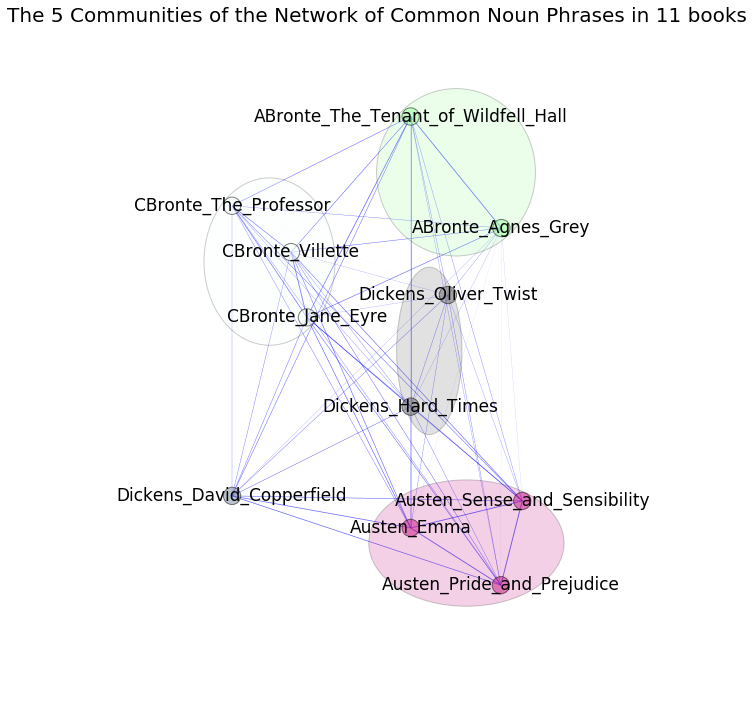

In [69]:
sstt="Network of Common Noun Phrases "#\n(Sentences colored in subjectivity)"# %titlename
part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.6
vcc={}
sstta="The %s Communities of the Network of Common Noun Phrases in %i books" %(max(part.values())+1,len(titlenames))#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

In [79]:
filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt',
           'VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt',
           'VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Agnes.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/ABronte_Tenant.txt',#]
#           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Oliver_Twist.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_David.txt',
           'VarLiteratureBooksCorpora/british-fiction-corpus/Dickens_Hard.txt',
          'VarLiteratureBooksCorpora/X/u.txt',#],
#             'VarLiteratureBooksCorpora/X/x1.txt',
#            'VarLiteratureBooksCorpora/X/x2.txt',
          'VarLiteratureBooksCorpora/X/De.txt']
# filenames = ['/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','/home/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/EstoniaDigitalHumanitiesConferenceOct2016/VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
# titlename = "Plato's Protagoras"
# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
titlenames=['Austen_Emma',
            'Austen_Pride_and_Prejudice',
            'Austen_Sense_and_Sensibility',
            'CBronte_Jane_Eyre',
            'CBronte_The_Professor',
            'CBronte_Villette',
#             'Dickens_Oliver_Twist',
            'Dickens_David_Copperfield',
            'Dickens_Hard_Times',
            'ABronte_Agnes_Grey',
           'ABronte_The_Tenant_of_Wildfell_Hall',#]
            'U',
#             'X1',
#             'X2',
            'Y']
# e']
# filenames=['VarLiteratureBooksCorpora/austen-brontë/Austen_Emma.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Pride.txt','VarLiteratureBooksCorpora/austen-brontë/Austen_Sense.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Jane.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Professor.txt','VarLiteratureBooksCorpora/austen-brontë/CBronte_Villette.txt']
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()
        

# titlenames=['Austen_Emma','Austen_Pride','Austen_Sense','CBronte_Jane','CBronte_Professor','CBronte_Villette']
blobs={}
for ii,filename in enumerate(filenames):
    f = codecs.open(filename, "r", encoding="utf-8").read()

    num_lines = 0
    num_words = 0
    num_chars = 0
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
    print "%s has number of words = %i and number of characters = %i" %(titlenames[ii],num_words,num_chars)
    blobs[ii] = TextBlob(f,np_extractor=extractor)
#     blobs[ii] = TextBlob(f)

Austen_Emma has number of words = 722590 and number of characters = 894304
Austen_Pride_and_Prejudice has number of words = 559895 and number of characters = 683754
Austen_Sense_and_Sensibility has number of words = 549519 and number of characters = 678691
CBronte_Jane_Eyre has number of words = 833207 and number of characters = 1026320
CBronte_The_Professor has number of words = 410310 and number of characters = 506144
CBronte_Villette has number of words = 894846 and number of characters = 1104704
Dickens_David_Copperfield has number of words = 305043 and number of characters = 378987
Dickens_Hard_Times has number of words = 745634 and number of characters = 930593
ABronte_Agnes_Grey has number of words = 1568283 and number of characters = 1960784
ABronte_The_Tenant_of_Wildfell_Hall has number of words = 466283 and number of characters = 572724
U has number of words = 993145 and number of characters = 1216033
Y has number of words = 132904 and number of characters = 163429


In [80]:
moccurdic={}
for ii,blob in blobs.items():
    all_sents=blob.sentences
    occurdic=Counter()
    for sen in all_sents:
        dd=sen.dict
        for np in dd['noun_phrases']:
            occurdic[np]+=1

    moccurdic[ii]=Counter(occurdic)

In [81]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
# stop=set()
ses=None
for ii,vv in moccurdic.items():
#     print ii,set(vv).intersection(stop).intersection(ses)
    if ses==None:
        
        ses=set(vv.keys())-stop
    else:
        ses=ses.intersection(set(vv.keys())-stop)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnamesa=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]
    dff.append(dfd)
dfnamesa=pd.DataFrame(dff)
# ses
dfnamesa=dfnamesa[columnss]
dfnamesa

The 12 books have the following 11 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
0,same time,9,16,21,7,9,14,2,9,14,5,11,2
1,god,3,3,4,97,22,43,30,68,36,9,65,14
2,mr.,73,36,15,20,10,3,9,30,121,18,45,5
3,mrs.,36,2,5,15,1,7,2,21,19,3,17,1
4,great deal,50,19,22,11,2,6,3,4,27,4,13,1
5,own way,6,4,3,4,2,11,3,6,8,1,8,1
6,first time,3,4,6,12,9,9,1,6,22,7,14,2
7,london,42,47,30,16,7,8,8,27,80,7,5,2
8,i.,1,1,1,19,18,20,11,72,225,5,11,1
9,last night,5,7,6,15,5,7,3,5,18,15,13,4


In [82]:
ses=None
excluded=['have','was','shall',"ca n't",'think']
# excluded=[]
for ii,vv in moccurdic.items():
    vv=set(vv.keys()) -(set(excluded))
    if ses==None:
        ses=set(vv)
    else:
        ses=ses.intersection(set(vv))
#     print ii,len(ses)
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
print 'The %i books have the following %i common noun phrases:' %(len(titlenames),len(ses))
columnss=['noun_phrase']
for tit in list(titlenames):
    columnss.append(tit)

dfnames=pd.DataFrame()
dff=[]
for sss in ses:
    
    dfd={'noun_phrase':sss}
#     dff.append({})
#     print sss,
    for ii,vv in moccurdic.items():
        dfd[titlenames[ii]]=vv[sss]*1./sum(moccurdic[ii].values())
    dff.append(dfd)
#         print ii,'=>',vv[sss],
#     print 
dfnames=pd.DataFrame(dff)
# ses
dfnames=dfnames[columnss]
dfnames

The 12 books have the following 11 common noun phrases:
The 12 books have the following 11 common noun phrases:


,noun_phrase,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
0,same time,0.000947,0.002346,0.003139,0.000775,0.001948,0.001344,0.000703,0.001313,0.000662,0.000753,0.000853,0.001028
1,god,0.000316,0.000440,0.000598,0.010741,0.004761,0.004127,0.010541,0.009917,0.001703,0.001356,0.005043,0.007198
2,mr.,0.007679,0.005279,0.002242,0.002215,0.002164,0.000288,0.003162,0.004375,0.005725,0.002712,0.003491,0.002571
3,mrs.,0.003787,0.000293,0.000747,0.001661,0.000216,0.000672,0.000703,0.003063,0.000899,0.000452,0.001319,0.000514
4,great deal,0.005260,0.002786,0.003288,0.001218,0.000433,0.000576,0.001054,0.000583,0.001277,0.000603,0.001009,0.000514
5,own way,0.000631,0.000587,0.000448,0.000443,0.000433,0.001056,0.001054,0.000875,0.000378,0.000151,0.000621,0.000514
6,first time,0.000316,0.000587,0.000897,0.001329,0.001948,0.000864,0.000351,0.000875,0.001041,0.001055,0.001086,0.001028
7,london,0.004418,0.006891,0.004484,0.001772,0.001515,0.000768,0.002811,0.003938,0.003785,0.001055,0.000388,0.001028
8,i.,0.000105,0.000147,0.000149,0.002104,0.003895,0.001920,0.003865,0.010500,0.010645,0.000753,0.000853,0.000514
9,last night,0.000526,0.001026,0.000897,0.001661,0.001082,0.000672,0.001054,0.000729,0.000852,0.002260,0.001009,0.002057


In [83]:
dfnamescor=dfnames.corr()
dfnamescor

,Austen_Emma,Austen_Pride_and_Prejudice,Austen_Sense_and_Sensibility,CBronte_Jane_Eyre,CBronte_The_Professor,CBronte_Villette,Dickens_David_Copperfield,Dickens_Hard_Times,ABronte_Agnes_Grey,ABronte_The_Tenant_of_Wildfell_Hall,U,Y
Austen_Emma,1.000000,0.737554,0.466661,-0.125662,-0.253200,-0.423825,-0.084893,-0.090078,0.162739,0.373403,0.172581,-0.106221
Austen_Pride_and_Prejudice,0.737554,1.000000,0.776216,-0.142239,-0.100232,-0.340597,-0.028957,-0.090427,0.179776,0.384375,-0.016596,-0.069630
Austen_Sense_and_Sensibility,0.466661,0.776216,1.000000,-0.305833,-0.329895,-0.416706,-0.242817,-0.367833,-0.152383,-0.021210,-0.266706,-0.223123
CBronte_Jane_Eyre,-0.125662,-0.142239,-0.305833,1.000000,0.757277,0.893214,0.955055,0.698834,0.070866,0.262050,0.861505,0.944444
CBronte_The_Professor,-0.253200,-0.100232,-0.329895,0.757277,1.000000,0.826722,0.830752,0.869896,0.555330,0.306883,0.636064,0.681843
CBronte_Villette,-0.423825,-0.340597,-0.416706,0.893214,0.826722,1.000000,0.882169,0.744845,0.143459,-0.021603,0.640117,0.778084
Dickens_David_Copperfield,-0.084893,-0.028957,-0.242817,0.955055,0.830752,0.882169,1.000000,0.823615,0.292187,0.258796,0.823866,0.892249
Dickens_Hard_Times,-0.090078,-0.090427,-0.367833,0.698834,0.869896,0.744845,0.823615,1.000000,0.719413,0.149004,0.556449,0.537207
ABronte_Agnes_Grey,0.162739,0.179776,-0.152383,0.070866,0.555330,0.143459,0.292187,0.719413,1.000000,0.233764,0.080887,-0.053368
ABronte_The_Tenant_of_Wildfell_Hall,0.373403,0.384375,-0.021210,0.262050,0.306883,-0.021603,0.258796,0.149004,0.233764,1.000000,0.506318,0.440527


In [84]:
G=nx.Graph()
ddd=dfnamescor.to_dict(orient='index')
# print ddd
for k,v in ddd.items():
    for kk,vv in v.items():
        G.add_edge(k,kk,weight=vv)
import community as comms
part = comms.best_partition(G)
# print part
npart={}
for k,v in part.items():
    if v not in npart:
        npart[v]=[]
    npart[v].append(k)
npart

{0: ['Austen_Pride_and_Prejudice',
  'Austen_Sense_and_Sensibility',
  'Austen_Emma',
  'ABronte_The_Tenant_of_Wildfell_Hall'],
 1: ['Dickens_David_Copperfield',
  'CBronte_Villette',
  'CBronte_Jane_Eyre',
  'U',
  'Y'],
 2: ['ABronte_Agnes_Grey', 'Dickens_Hard_Times', 'CBronte_The_Professor']}

Number of communities of Network of Common Noun Phrases  = 3
Community partition of Network of Common Noun Phrases :
[['Austen_Pride_and_Prejudice', 'Austen_Sense_and_Sensibility', 'Austen_Emma', 'ABronte_The_Tenant_of_Wildfell_Hall'], ['Dickens_David_Copperfield', 'CBronte_Villette', 'CBronte_Jane_Eyre', 'U', 'Y'], ['ABronte_Agnes_Grey', 'Dickens_Hard_Times', 'CBronte_The_Professor']]
Community modularity of Network of Common Noun Phrases  = 0.4095


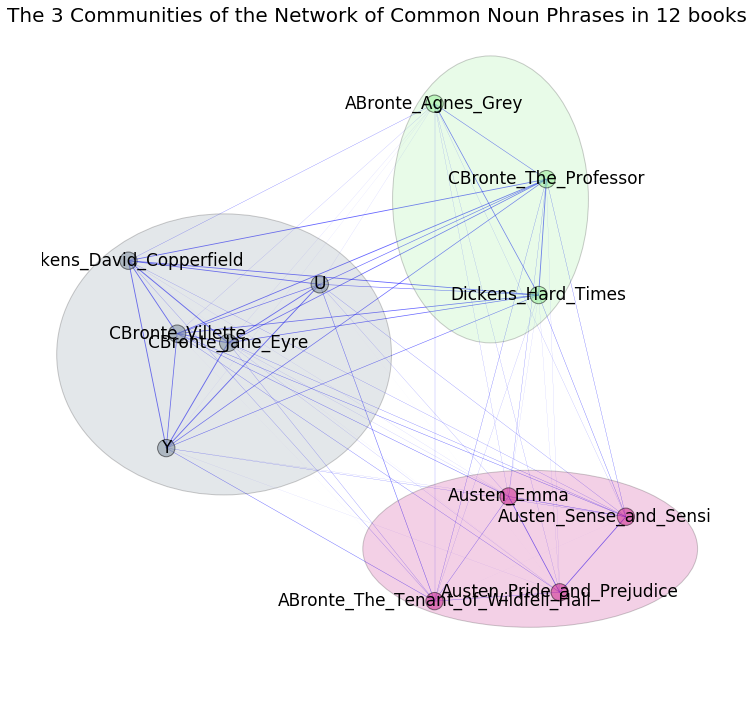

In [85]:
sstt="Network of Common Noun Phrases "#\n(Sentences colored in subjectivity)"# %titlename
part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.6
vcc={}
sstta="The %s Communities of the Network of Common Noun Phrases in %i books" %(max(part.values())+1,len(titlenames))#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)